# Visualization of Stock Trading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import datetime
import pandas_datareader.data as web

import matplotlib.pyplot as plt

In [2]:
# in case of error on notebook: Istll vega_datasets
#conda install -c conda-forge altair vega_datasets notebook vega
#see also https://altair-viz.github.io/getting_started/installation.html
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Set relevant parameters

In [3]:
#train_stock = 'data/GOOGL.csv'
#val_stock = 'data/AAPL_2018.csv'
window_size = 10
batch_size = 16
ep_count = 25 # for debugging, otherwise 15-50
model_name = 'model_Stefan'
pretrained = False
debug = False

## Load Dataset into pandas DataFrame

In [19]:
# read csv into dataframe
#df = pd.read_csv(val_stock)

# Setting Start and Enddate for Validation
start_train= datetime.datetime(2012, 1, 1)
end_train = datetime.datetime(2018, 1, 1)
start_val = end_train
end_val = datetime.datetime.now()


# Load Training and Validation data
# 1st. dataset as trading target
# 2nd. dataset as additional input feature

df_train = web.DataReader('AAPL','yahoo',
                               start=datetime.datetime(2012, 1, 1), #start_train
                               end=datetime.datetime(2018, 1, 1))  #end_train

df2_train = web.DataReader('AAPL','yahoo',
                               start=datetime.datetime(2012, 1, 10), #start_train
                               end=datetime.datetime(2018, 1, 10)) #end_train


df_val = web.DataReader('AAPL','yahoo',
                               start=datetime.datetime(2018, 1, 2), #start_train
                               end=datetime.datetime(2019, 9, 10)) #end_val
df2_val = web.DataReader('AAPL','yahoo',
                               start=datetime.datetime(2018, 1, 12), #start_val
                               end=datetime.datetime(2019, 9, 20))  #end_val

df = df_val # will be used to show actions and for plotting

#rename feature column names
df = df.rename(columns={'Adj Close': 'actual'})


# filter out the desired features



# Generate list objects
df_train_list = list(df_train['Adj Close'])
df_val_list = list(df_val['Adj Close'])
df2_train_list = list(df2_train['Adj Close'])
df2_val_list = list(df2_val['Adj Close'])



# Deleting obsolete dataframes
#del df_train
#del df2_val
#del df_train
#del df2_val

df.head()

# Open tast: Clean datasets (Adj Close, data that is not necessary)

I0929 16:25:50.639226 17708 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-09-29 16:25:50 PC-Stefan urllib3.connectionpool[4220] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I0929 16:25:51.123620 17708 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1325386800&period2=1514861999&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-09-29 16:25:51 PC-Stefan urllib3.connectionpool[4220] DEBUG https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1325386800&period2=1514861999&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I0929 16:25:51.233096 17708 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-09-29 16:25:51 PC-Stefan urllib3.connectionpool[4220] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I0929 16:25:51.608122 17708 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=132616

,High,Low,Open,Close,Volume,actual
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,168.451508
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588


In [5]:
#df_train.info()
#print(list(df_train['Adj Close']))



In [6]:
# convert dates from object to DateTime type
#dates = df['date']
#dates = pd.to_datetime(dates, infer_datetime_format=True)
#df['date'] = dates


In [7]:
#df.info()
#df.head()

day = df.index
print(day)
#print(df.head())

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
               '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27'],
              dtype='datetime64[ns]', name='Date', length=438, freq=None)


In [8]:
#ttd = get_stock_data(train_stock)
#print(ttd[-5:])
df.head()

,High,Low,Open,Close,Volume,actual
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,168.451508
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588


## Visualization of actions taken by Trading Bot

In [9]:
def visualize(df, history):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    #alt.Chart(df.reset_index()).mark_line().encode(x='index')
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df.reset_index()).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='Date:T', #'date:T'
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df.reset_index()).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
        #color=alt.Color('action', scale=alt.Scale(range=['blue', 'red']))
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title="your stock").properties(height=300, width=1000)
    
    return chart

In [20]:
#print(df.head())
#train_data2
print(ep_count)

25


## Training the model

In [21]:
import logging
import coloredlogs

from train import *
from evaluate import show_eval_result

coloredlogs.install(level='DEBUG')
switch_k_backend_device() #switches to CPU (acc. to author faster than GPU)


train_data = df_train_list  
val_data = df_val_list 
train_data2 = df2_train_list
val_data2 = df2_val_list



if train_data2 is not None:
    agent = Agent(window_size*2, pretrained=False, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=False, model_name=model_name)

initial_offset = val_data[1] - val_data[0]

reslist_t =[] # Train Reward for plotting
reslist_v = [] # Val Reward for plotting
for i in range(1, ep_count + 1): 
    train_result = train_model(agent, i, train_data, train_data2, ep_count=ep_count,
                                batch_size=batch_size, window_size=window_size)
    val_result, _ = evaluate_model(agent, val_data, val_data2, window_size, debug)
    show_train_result(train_result, val_result, initial_offset)
    reslist_t.append(train_result[2]) # append reward of training
    reslist_v.append(val_result)
    

I0929 16:26:09.044998 17708 train.py:157] switching to TensorFlow for CPU
2019-09-29 16:26:09 PC-Stefan root[4220] DEBUG switching to TensorFlow for CPU
Episode 1/25: 100%|██████████| 1508/1508 [00:14<00:00, 102.89it/s]
I0929 16:26:23.920096 17708 train.py:148] Episode 1/25 - Train Position: +$166.72  Val Position: -$12.77  Train Loss: 0.1426  (~14.6635 secs)
2019-09-29 16:26:23 PC-Stefan root[4220] INFO Episode 1/25 - Train Position: +$166.72  Val Position: -$12.77  Train Loss: 0.1426  (~14.6635 secs)
Episode 2/25: 100%|██████████| 1508/1508 [00:14<00:00, 103.77it/s]
I0929 16:26:38.560929 17708 train.py:148] Episode 2/25 - Train Position: +$57.48  Val Position: +$72.58  Train Loss: 0.0212  (~14.5319 secs)
2019-09-29 16:26:38 PC-Stefan root[4220] INFO Episode 2/25 - Train Position: +$57.48  Val Position: +$72.58  Train Loss: 0.0212  (~14.5319 secs)
Episode 3/25: 100%|██████████| 1508/1508 [00:14<00:00, 103.37it/s]
I0929 16:26:53.287587 17708 train.py:148] Episode 3/25 - Train Position:

2019-09-29 16:31:54 PC-Stefan root[4220] INFO Episode 23/25 - Train Position: +$521.39  Val Position: +$176.41  Train Loss: 0.2244  (~15.0832 secs)
Episode 24/25: 100%|██████████| 1508/1508 [00:15<00:00, 99.94it/s] 
I0929 16:32:09.775302 17708 train.py:148] Episode 24/25 - Train Position: +$344.54  Val Position: +$272.16  Train Loss: 0.1460  (~15.0924 secs)
2019-09-29 16:32:09 PC-Stefan root[4220] INFO Episode 24/25 - Train Position: +$344.54  Val Position: +$272.16  Train Loss: 0.1460  (~15.0924 secs)
Episode 25/25: 100%|██████████| 1508/1508 [00:15<00:00, 99.40it/s] 
I0929 16:32:25.075473 17708 train.py:148] Episode 25/25 - Train Position: +$415.45  Val Position: +$550.35  Train Loss: 0.1708  (~15.1729 secs)
2019-09-29 16:32:25 PC-Stefan root[4220] INFO Episode 25/25 - Train Position: +$415.45  Val Position: +$550.35  Train Loss: 0.1708  (~15.1729 secs)


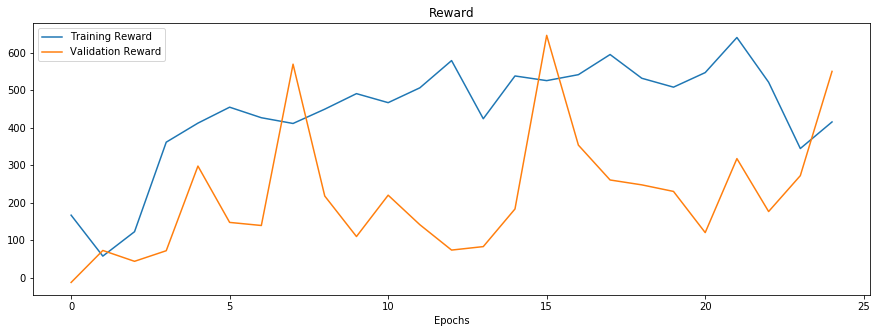

In [22]:
# Plotting Result
plt.figure(figsize = (15,5))
plt.plot(reslist_t, label = "Training Reward");
plt.plot(reslist_v, label = "Validation Reward");
plt.title("Reward")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Plotting the evaluation actions

I0929 16:32:57.979644 17708 evaluate.py:111] model_Stefan: +$550.35

2019-09-29 16:32:57 PC-Stefan root[4220] INFO model_Stefan: +$550.35



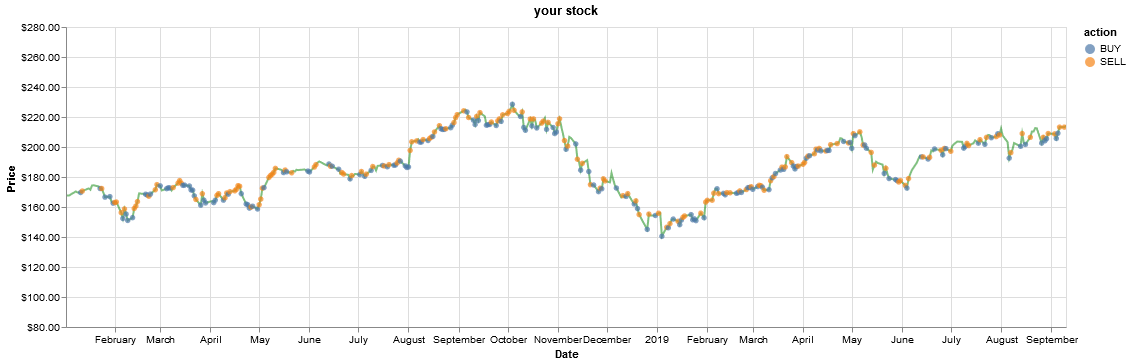

In [23]:
val_result, history = evaluate_model(agent, val_data,val_data2, window_size, debug)
show_eval_result(model_name, val_result, initial_offset)
chart = visualize(df, history)
chart

## Testing the Model

In [14]:
# Loading Test Data

# Setting Start and Enddate for Validation

start_test = datetime.datetime(2018, 1, 1)
end_test = datetime.datetime.now()


# Load Training and Validation data
# 1st. dataset as trading target
# 2nd. dataset as additional input feature

df_test = web.DataReader('GooG','yahoo',
                               start=start_test, 
                               end=end_test)

df2_test = web.DataReader('GOLD','yahoo',
                               start=start_test, 
                               end=end_test)


dft = df_test # will be used to show actions and for plotting

#rename feature column names
dft = dft.rename(columns={'Adj Close': 'actual'})


# Generate list objects
df_test_list = list(df_test['Adj Close'])
df2_test_list = list(df2_test['Adj Close'])


# Deleting obsolete dataframes
#del df_test
#del df2_test



I0929 14:45:27.576262 17708 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-09-29 14:45:27 PC-Stefan urllib3.connectionpool[4220] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I0929 14:45:27.888784 17708 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/GooG/history?period1=1514775600&period2=1569808799&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-09-29 14:45:27 PC-Stefan urllib3.connectionpool[4220] DEBUG https://finance.yahoo.com:443 "GET /quote/GooG/history?period1=1514775600&period2=1569808799&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I0929 14:45:27.982541 17708 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-09-29 14:45:27 PC-Stefan urllib3.connectionpool[4220] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I0929 14:45:28.466961 17708 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/GOLD/history?period1=151477

I0929 15:03:46.121451 17708 evaluate.py:111] model_Stefan: +$707.54

2019-09-29 15:03:46 PC-Stefan root[4220] INFO model_Stefan: +$707.54



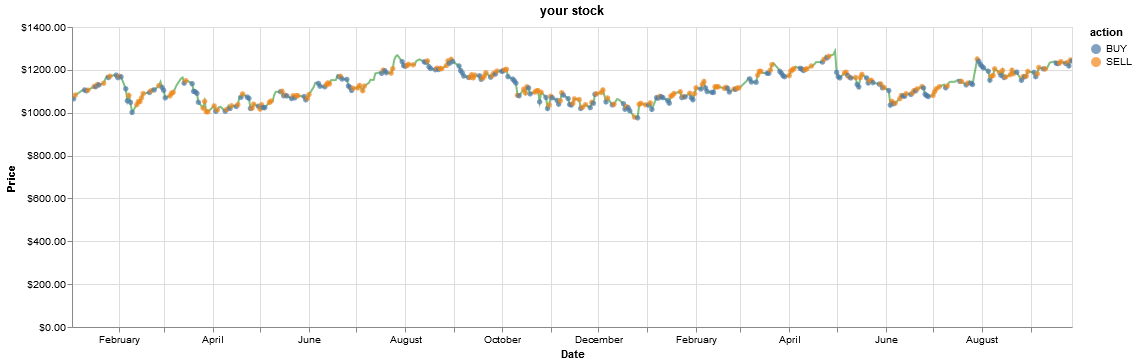

In [16]:
test_data = df_test_list
test_data2 = df2_test_list


val_result, history = evaluate_model(agent, test_data, test_data2, window_size, debug)
show_eval_result(model_name, val_result, initial_offset)
chart = visualize(df, history)
chart
#print(val_result)